In [1]:
import pandas as pd
import re

# Load your Lovecraft dataset
lovecraft_data = pd.read_csv('data/lovecraft_fiction.csv')

# Clean text data (e.g., remove special characters, convert to lowercase)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetical characters
    return text

# Apply cleaning function to the data
cleaned_texts = lovecraft_data['Text'].apply(clean_text)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json

# Tokenization
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(cleaned_texts)
sequences = tokenizer.texts_to_sequences(cleaned_texts)

# Save the tokenizer for future use
with open('data/tokenizer.json', 'w') as f:
    json.dump(tokenizer.to_json(), f)

# Set a max sequence length
max_length = 100  # Or another suitable value depending on your data
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Check the shape of padded sequences
print(f"Shape of padded sequences: {padded_sequences.shape}")

import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val = train_test_split(padded_sequences, test_size=0.2, random_state=42)

# Create labels (assuming you're performing a classification task)
y_train = np.random.randint(0, 2, size=(len(X_train),))  # Example: binary classification
y_val = np.random.randint(0, 2, size=(len(X_val),))  # Adjust depending on your task

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.optimizers import Adam

# Define the model again with a fixed max_length
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length),  # Use max_length here
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Initialize the model parameters by training on a small batch
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Check model summary again
model.summary()



Shape of padded sequences: (104, 100)
Epoch 1/10


c:\Users\Marc Jay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.4775 - loss: 0.6935 - val_accuracy: 0.4286 - val_loss: 0.6955
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5783 - loss: 0.6894 - val_accuracy: 0.4286 - val_loss: 0.6985
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5783 - loss: 0.6841 - val_accuracy: 0.4286 - val_loss: 0.7051
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5678 - loss: 0.6745 - val_accuracy: 0.4286 - val_loss: 0.7214
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5783 - loss: 0.6556 - val_accuracy: 0.4286 - val_loss: 0.7796
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5678 - loss: 0.6301 - val_accuracy: 0.4286 - val_loss: 0.8765
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5783 - loss: 0.5783 - val_accuracy: 0.4286 - val_loss: 0.8330
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6473 - loss: 0.4652 - val_accuracy: 0.4286 - val_loss: 0.9161
Epoch 9/10

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     5,161,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 128)       │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,990,809 (61.00 MB)

 Trainable params: 5,330,269 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,660,540 (40.67 MB)

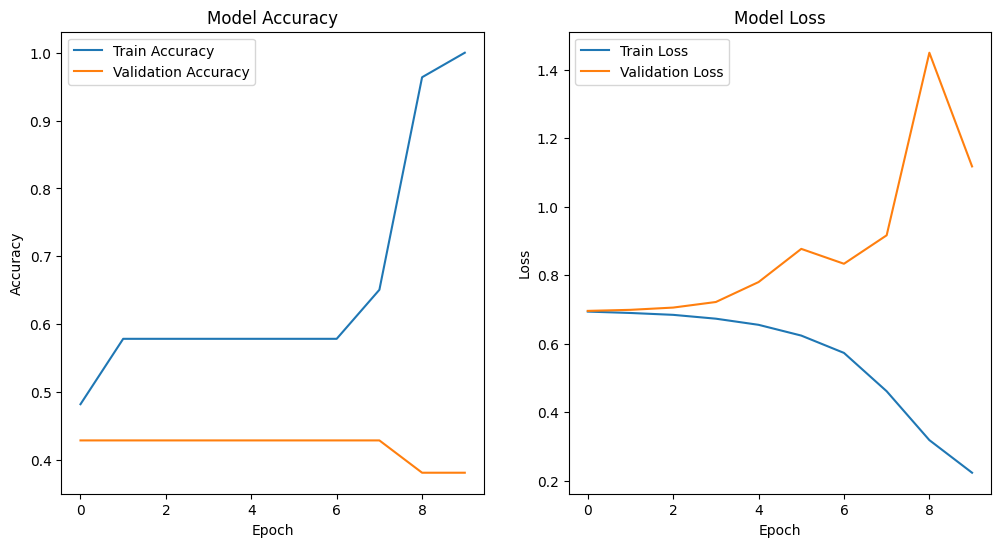

In [3]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves for training and validation
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    
    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the plot function after model training
plot_training_history(history)
